In [1]:
!pip install SciencePlots

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import os
import subprocess
import shutil
import time
from nilearn import datasets, image, masking
from nilearn.image import load_img, index_img
from nilearn.plotting import plot_epi
from nilearn.maskers import NiftiLabelsMasker
from PyIF import te_compute as te
from joblib import delayed, Parallel
import pandas as pd
from scipy.stats import zscore
from scipy.optimize import curve_fit
from joblib import Parallel, delayed
import glob
from utils.data_loader import DataLoader
from utils.plotting import plot_voxels, plot_w_fit
# from utils.relaxation_time import RelaxationTime
import seaborn as sns
import nibabel as nib
from nilearn import image, plotting, datasets
import scipy.stats as stats
import warnings
import scienceplots
import matplotlib as mpl
import warnings
warnings.filterwarnings(action='ignore')
plt.style.use(['science','no-latex', 'ieee'])
plt.rcParams.update({
    "font.family": "DejaVu Sans",   # specify font family here
})

/scratch/shivansh.seth/preproc/lib/python3.10/site-packages/numba/core/decorators.py:253: RuntimeWarning: nopython is set for njit and is ignored
  warnings.warn('nopython is set for njit and is ignored', RuntimeWarning)


In [2]:
root_dir = '/scratch/shivansh.seth/adni/preproc'
SCRATCH_DATA_DIR = '/scratch/shivansh.seth/tmp/'
PRINT_TIME_INTERVAL = 20
if not os.path.exists(SCRATCH_DATA_DIR): os.makedirs(SCRATCH_DATA_DIR)
    
dloader = DataLoader(root_dir)
# rt = RelaxationTime(root_dir, SCRATCH_DATA_DIR)

print("Loaded " + str(len(dloader.subjects_list)) + " subjects")

Loaded 89 subjects


In [3]:
sig_rois = np.load('results/significant_regions_ss.npy')

In [4]:
template = datasets.load_mni152_template()
aal = datasets.fetch_atlas_aal()

In [5]:
func_img = dloader.get_func(dloader.subjects_list[31])
anat_img = dloader.get_anat(dloader.subjects_list[31])
fdata = func_img.get_fdata()
shape = fdata.shape[:-1]
# resampled_anat = 

In [6]:
sig_rois_vox = np.unravel_index(sig_rois, shape=shape)

In [7]:
# cut_lim = 10
sig_mask = np.zeros(shape)
sig_mask[sig_rois_vox] = 1
# mask_data[-cut_lim:, -cut_lim:, -cut_lim:] = 0
# mask_data[:cut_lim, :cut_lim, :cut_lim] = 0

In [12]:
len(sig_rois_vox[0])

222

In [15]:
func_img_mni = image.resample_to_img(func_img, template)

In [ ]:
brain_mask = masking.compute_epi_mask(template)


In [8]:
sig_img = image.new_img_like(func_img, sig_mask)
sig_img_mni = image.resample_to_img(sig_img, template)

In [9]:
mni_shape = template.get_fdata().shape
mask_data_mni = np.zeros(mni_shape)


In [10]:
mask_data_mni= sig_img_mni.get_fdata()

(array([3.990123e+06, 1.118000e+04, 6.882000e+03, 5.384000e+03,
        3.833000e+03, 2.733000e+03, 1.830000e+03, 1.003000e+03,
        3.370000e+02, 8.800000e+01]),
 array([3.75780156e-36, 1.51252276e-01, 3.02504553e-01, 4.53756829e-01,
        6.05009105e-01, 7.56261382e-01, 9.07513658e-01, 1.05876593e+00,
        1.21001821e+00, 1.36127049e+00, 1.51252276e+00]),
 <BarContainer object of 10 artists>)

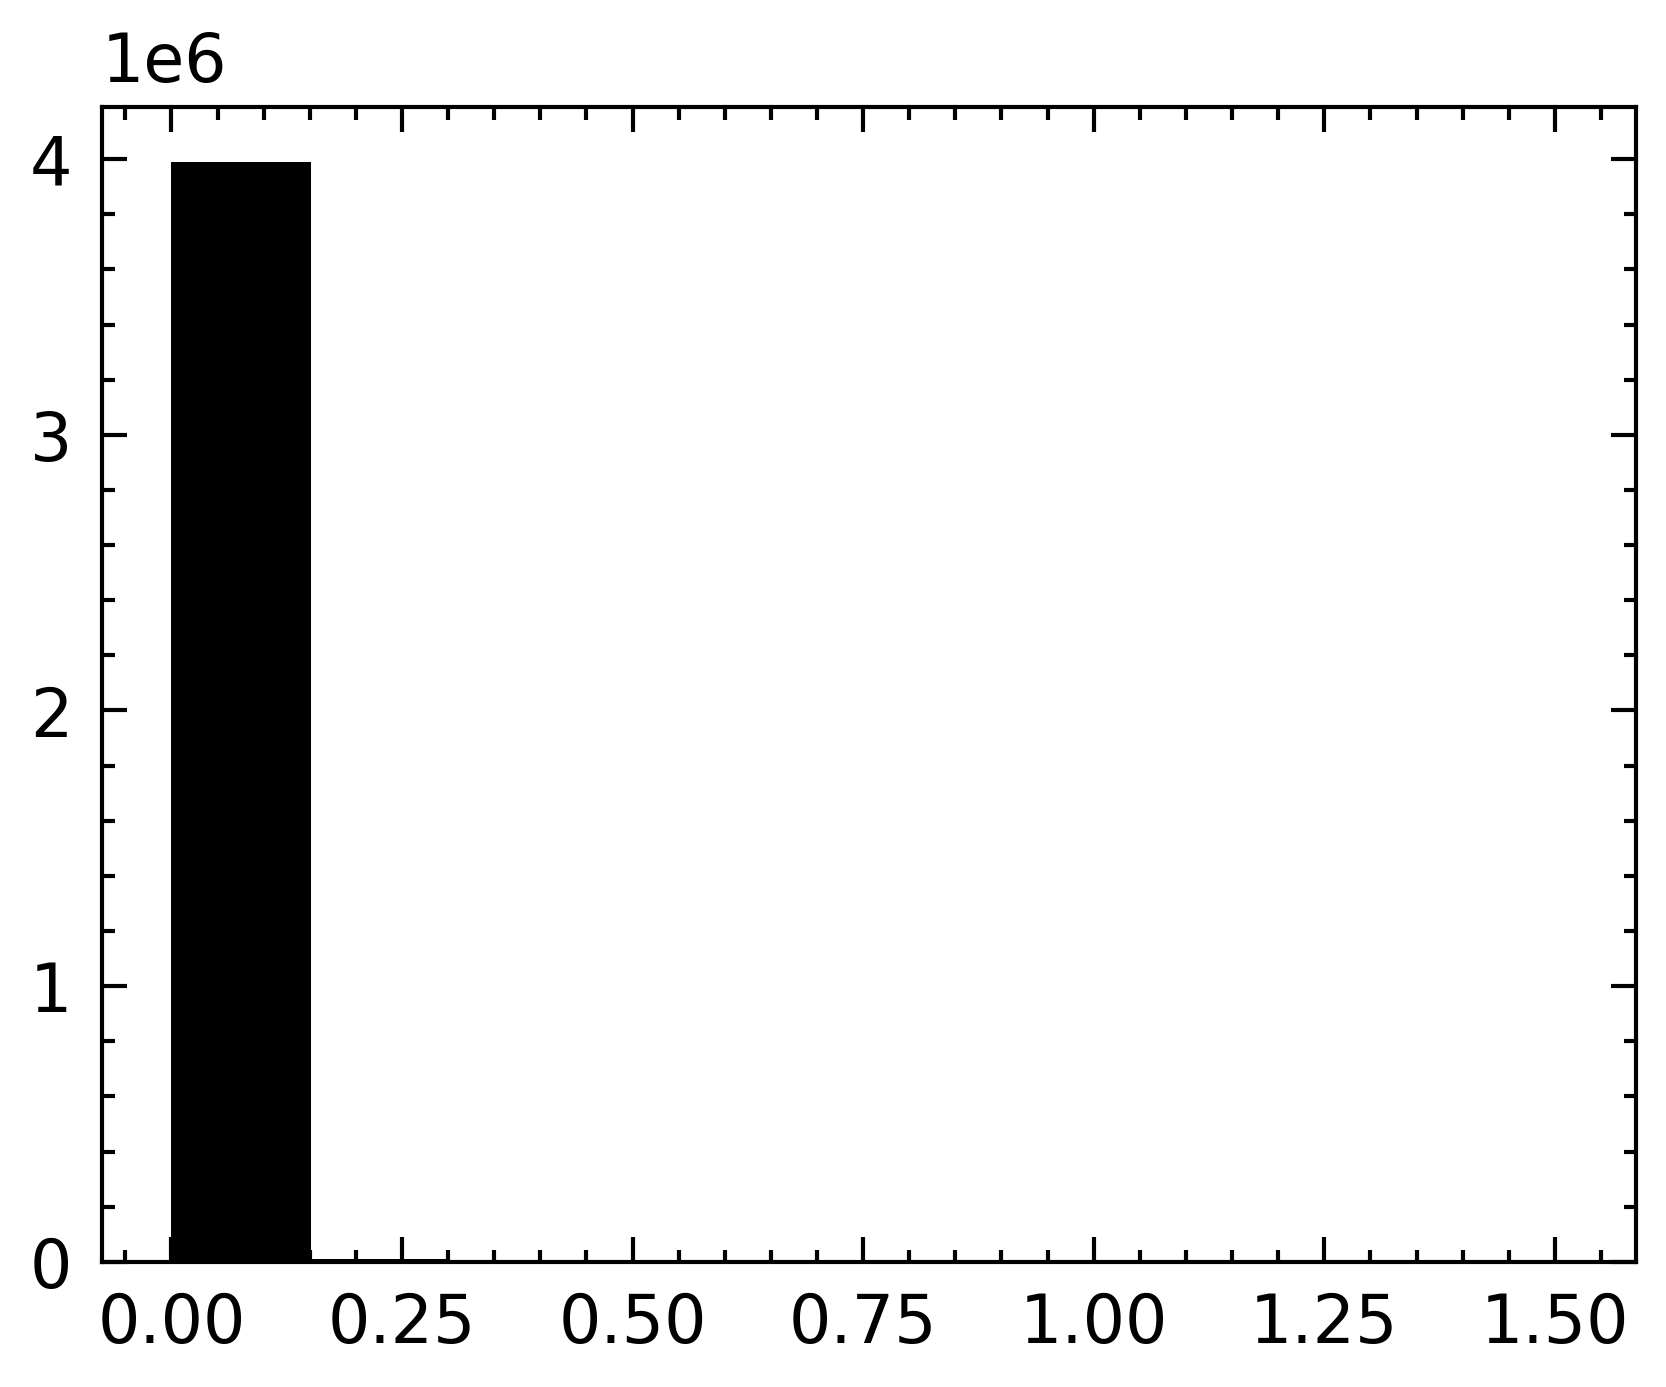

In [16]:
plt.hist(mask_data_mni[mask_data_mni>0])

The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


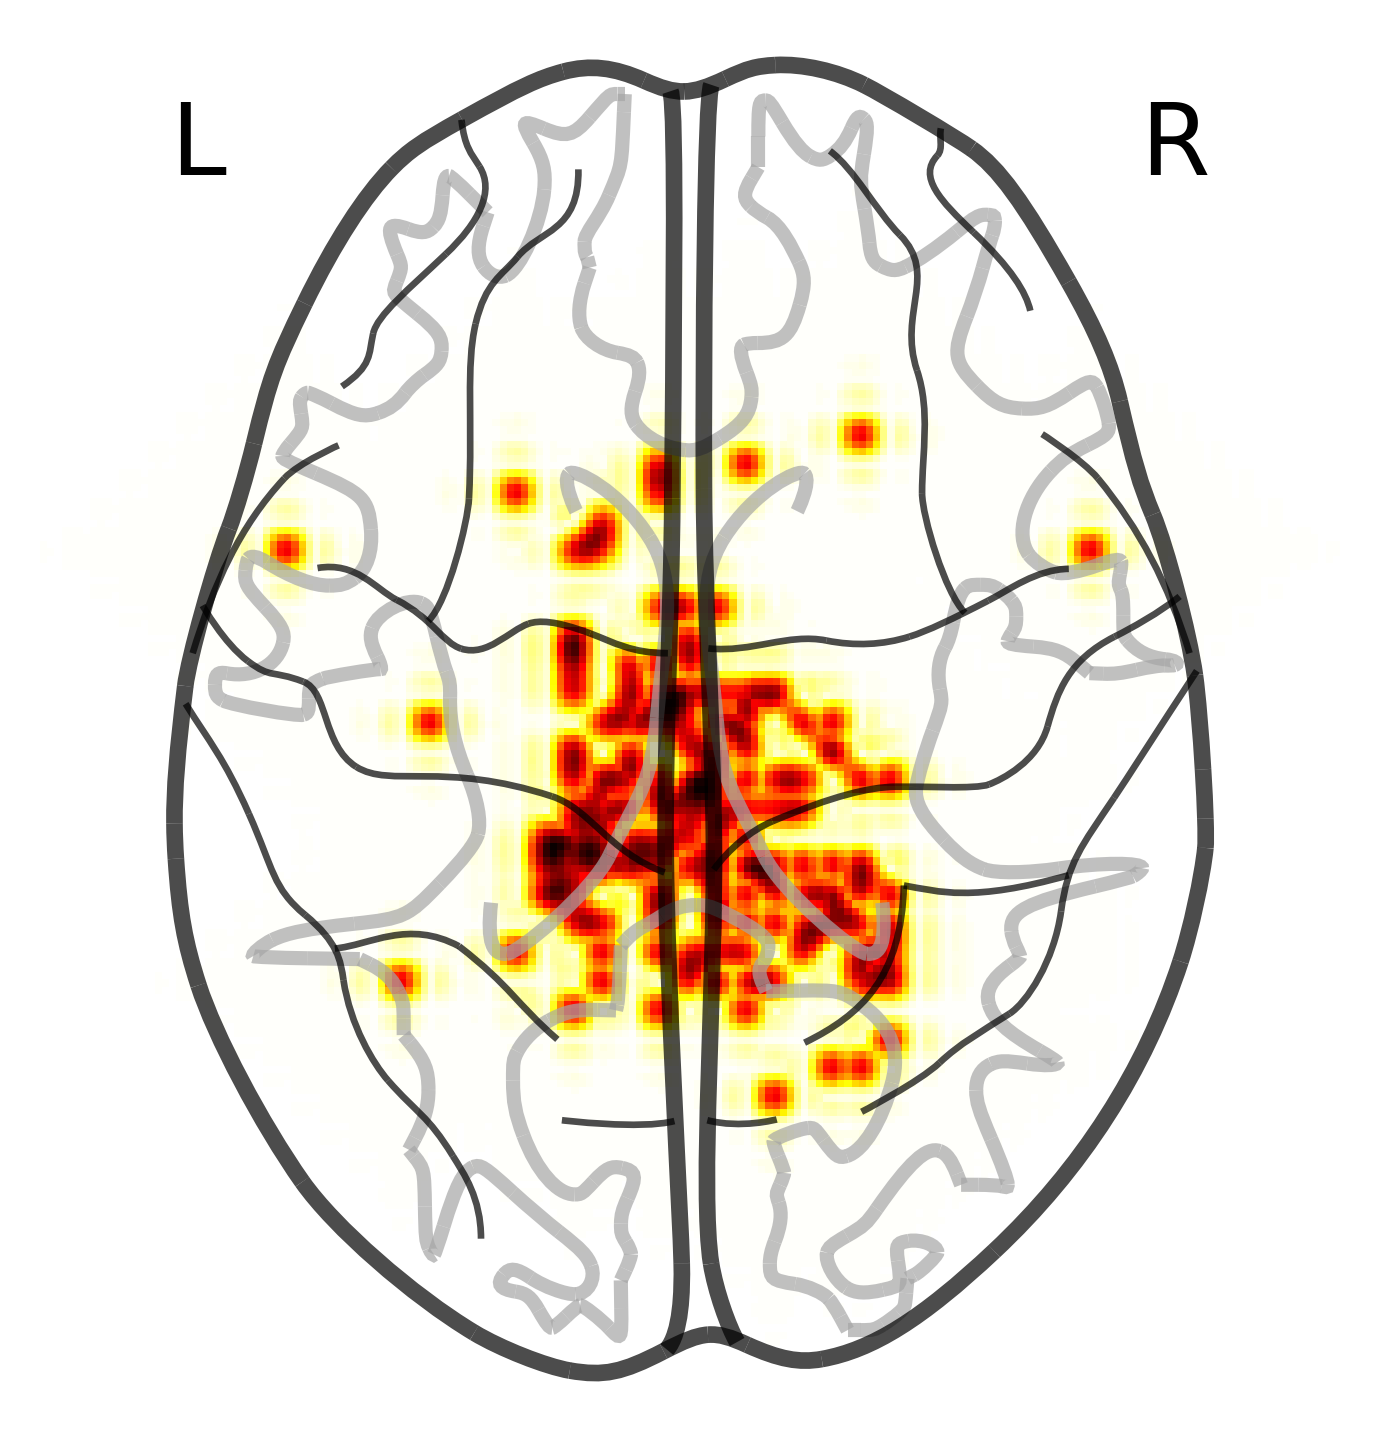

In [24]:
plotting.plot_glass_brain(sig_img_mni, display_mode='z')
plt.savefig('results/plots/sr_brain.eps', dpi=1200)

In [21]:
masker = NiftiLabelsMasker(labels_img=aal.maps, standardize=True)
roi_mask = masker.fit_transform(sig_img)[0]

In [20]:
# np.save('results/roi_mask', roi_mask)
roi_mask = np.load('results/roi_mask.npy')

In [21]:
idx = np.argsort(roi_mask)[::-1]
act = []
for i in idx:
    act.append(roi_mask[i])
    print(f'Region: {aal.labels[i]}, % of voxels significant: {roi_mask[i]*100:.2f}%')

Region: Cerebelum_3_L, % of voxels significant: 21.05%
Region: Vermis_3, % of voxels significant: 12.00%
Region: ParaHippocampal_L, % of voxels significant: 10.57%
Region: Thalamus_R, % of voxels significant: 8.70%
Region: Cingulum_Mid_L, % of voxels significant: 8.61%
Region: Thalamus_L, % of voxels significant: 8.22%
Region: Cingulum_Post_R, % of voxels significant: 8.00%
Region: Olfactory_L, % of voxels significant: 7.50%
Region: Cingulum_Mid_R, % of voxels significant: 6.02%
Region: Vermis_4_5, % of voxels significant: 5.63%
Region: Paracentral_Lobule_R, % of voxels significant: 5.26%
Region: Cerebelum_4_5_L, % of voxels significant: 4.73%
Region: Hippocampus_L, % of voxels significant: 4.13%
Region: Cingulum_Post_L, % of voxels significant: 3.57%
Region: Lingual_L, % of voxels significant: 2.80%
Region: Precuneus_R, % of voxels significant: 2.78%
Region: Pallidum_L, % of voxels significant: 2.44%
Region: Olfactory_R, % of voxels significant: 2.33%
Region: Supp_Motor_Area_L, % of v

/scratch/shivansh.seth/preproc/lib/python3.10/site-packages/numpy/core/fromnumeric.py:758: UserWarning: Warning: 'partition' will ignore the 'mask' of the MaskedArray.
  a.partition(kth, axis=axis, kind=kind, order=order)



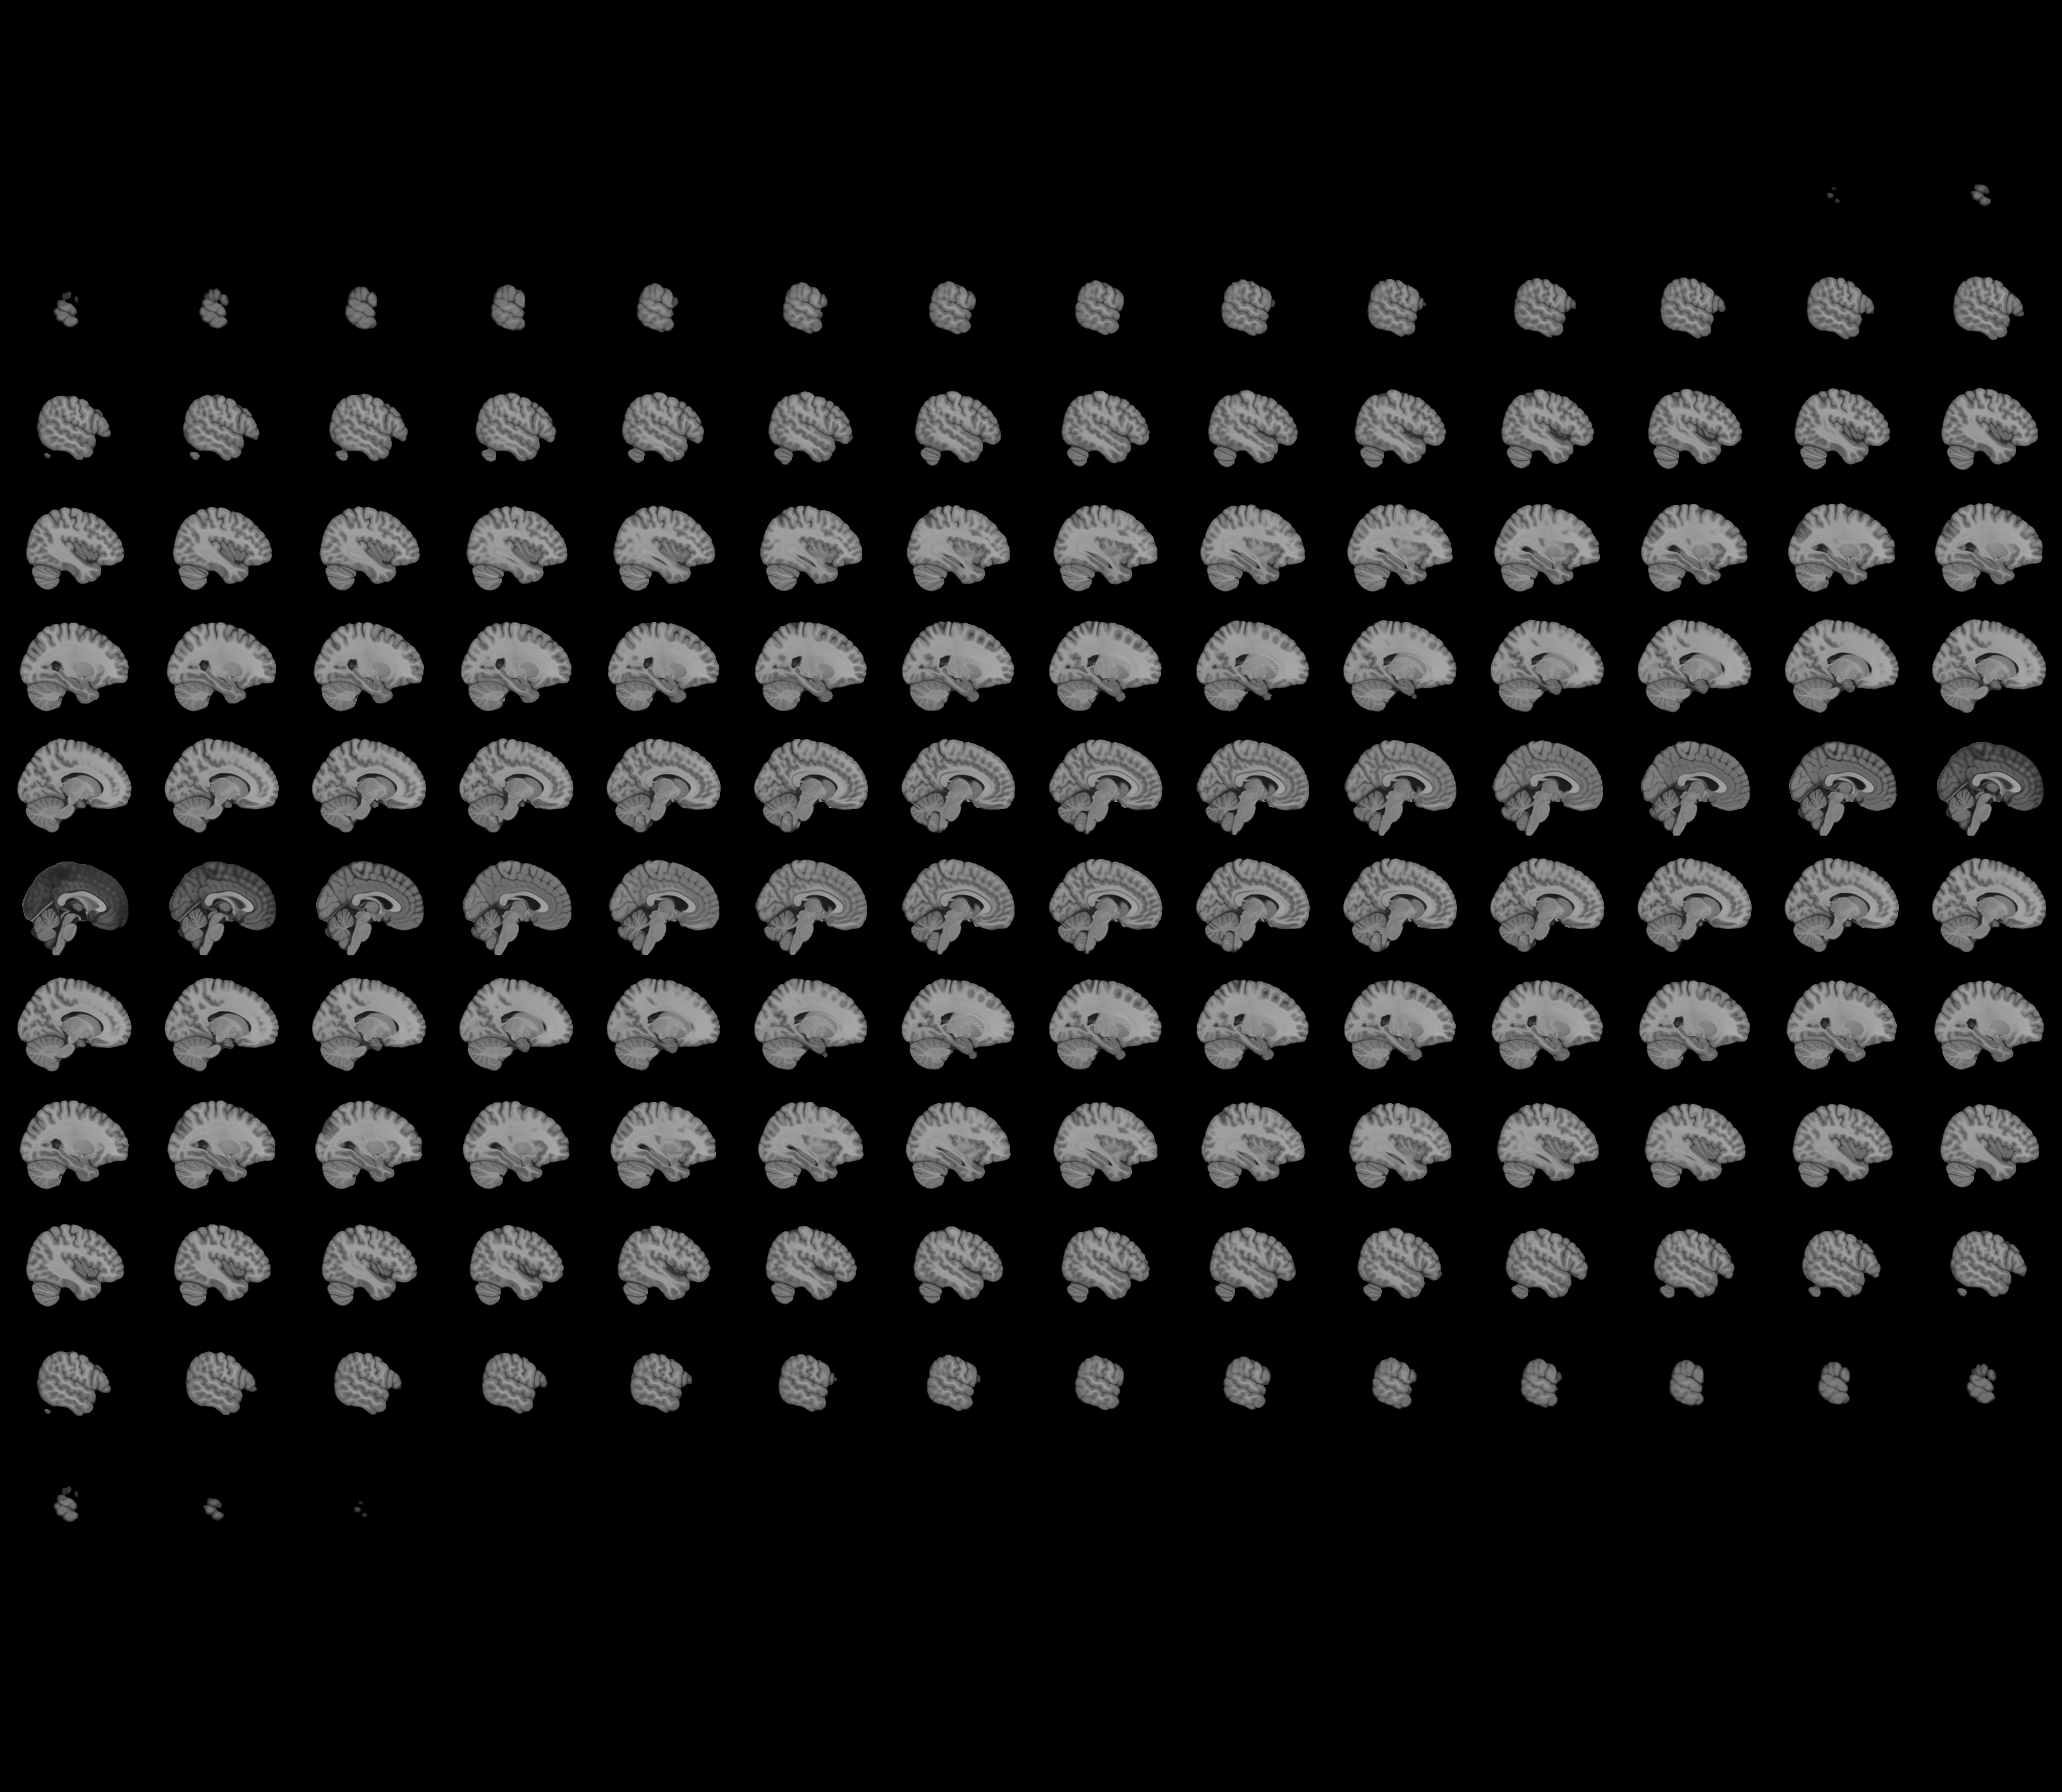
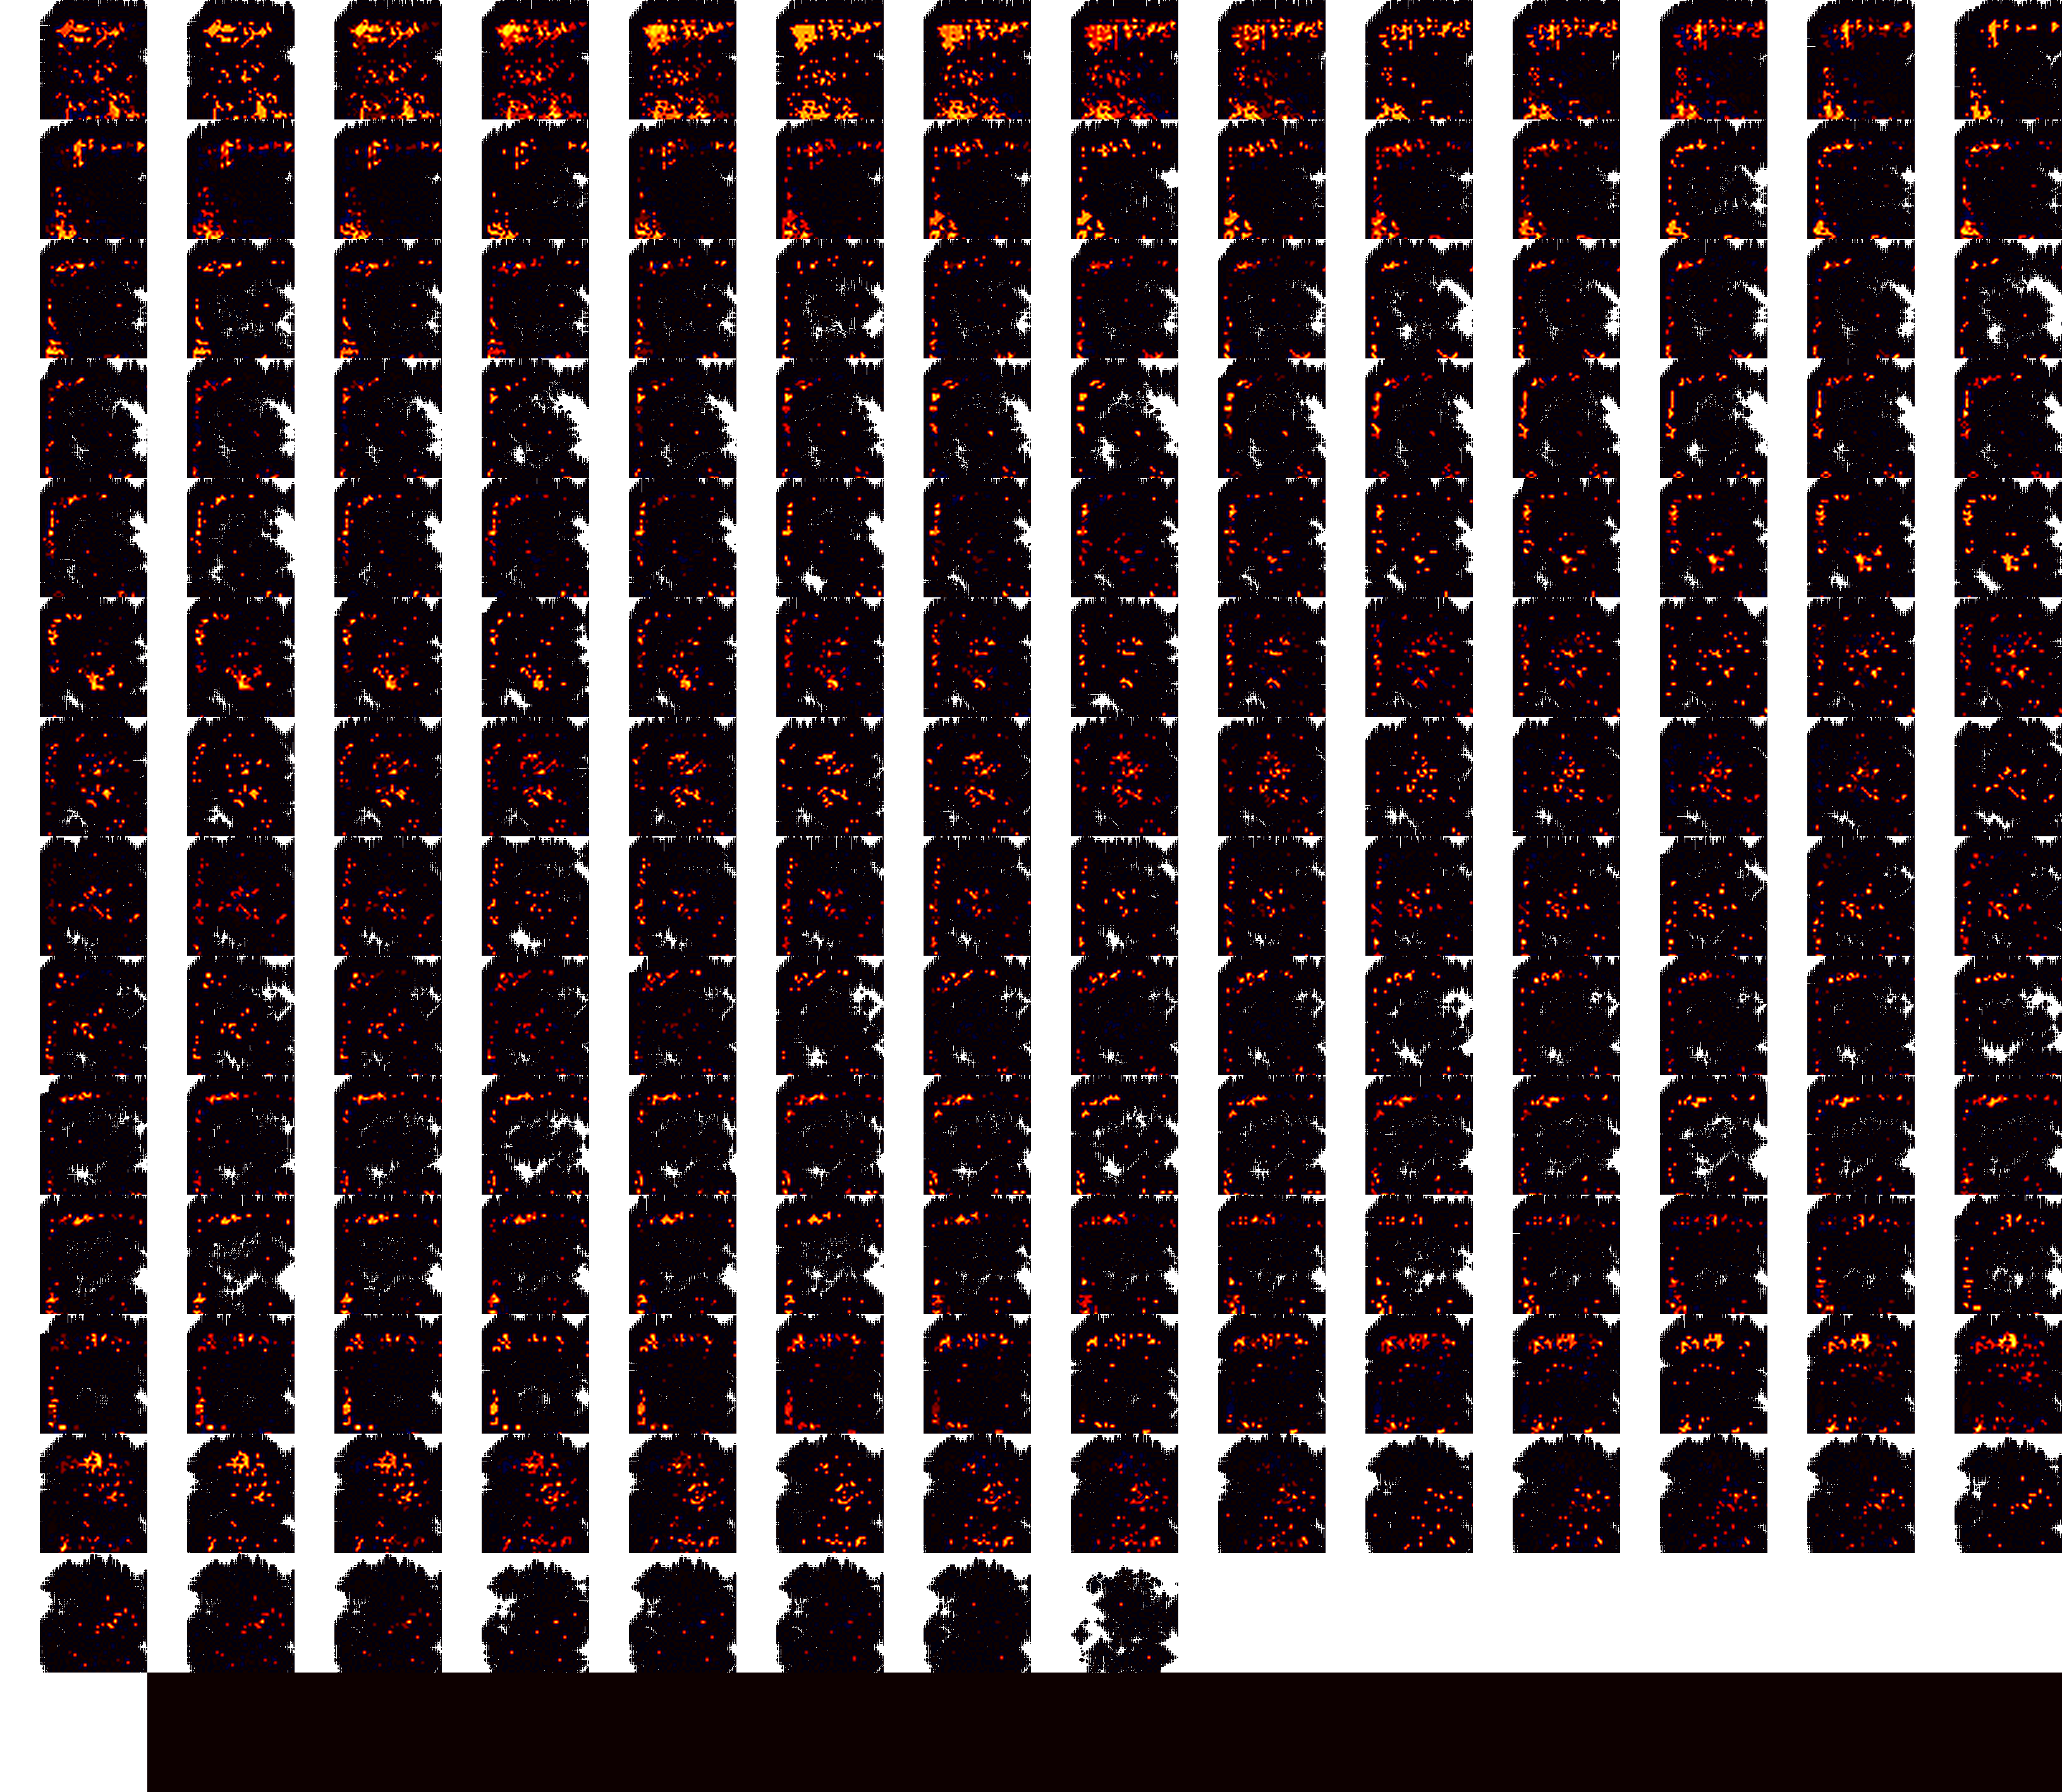

In [98]:
plotting.view_img(stat_img_mni)

## ROI plot

In [14]:
aal_atlas = nib.load(aal.maps)

Cerebelum_3_L 136
Vermis_3 228
ParaHippocampal_L 978
Thalamus_R 1057
Cingulum_Mid_L 1941
Thalamus_L 1100
Cingulum_Post_R 335
Olfactory_L 280
Cingulum_Mid_R 2203
Vermis_4_5 665


The PostScript backend does not support transparency; partially transparent artists will be rendered opaque.


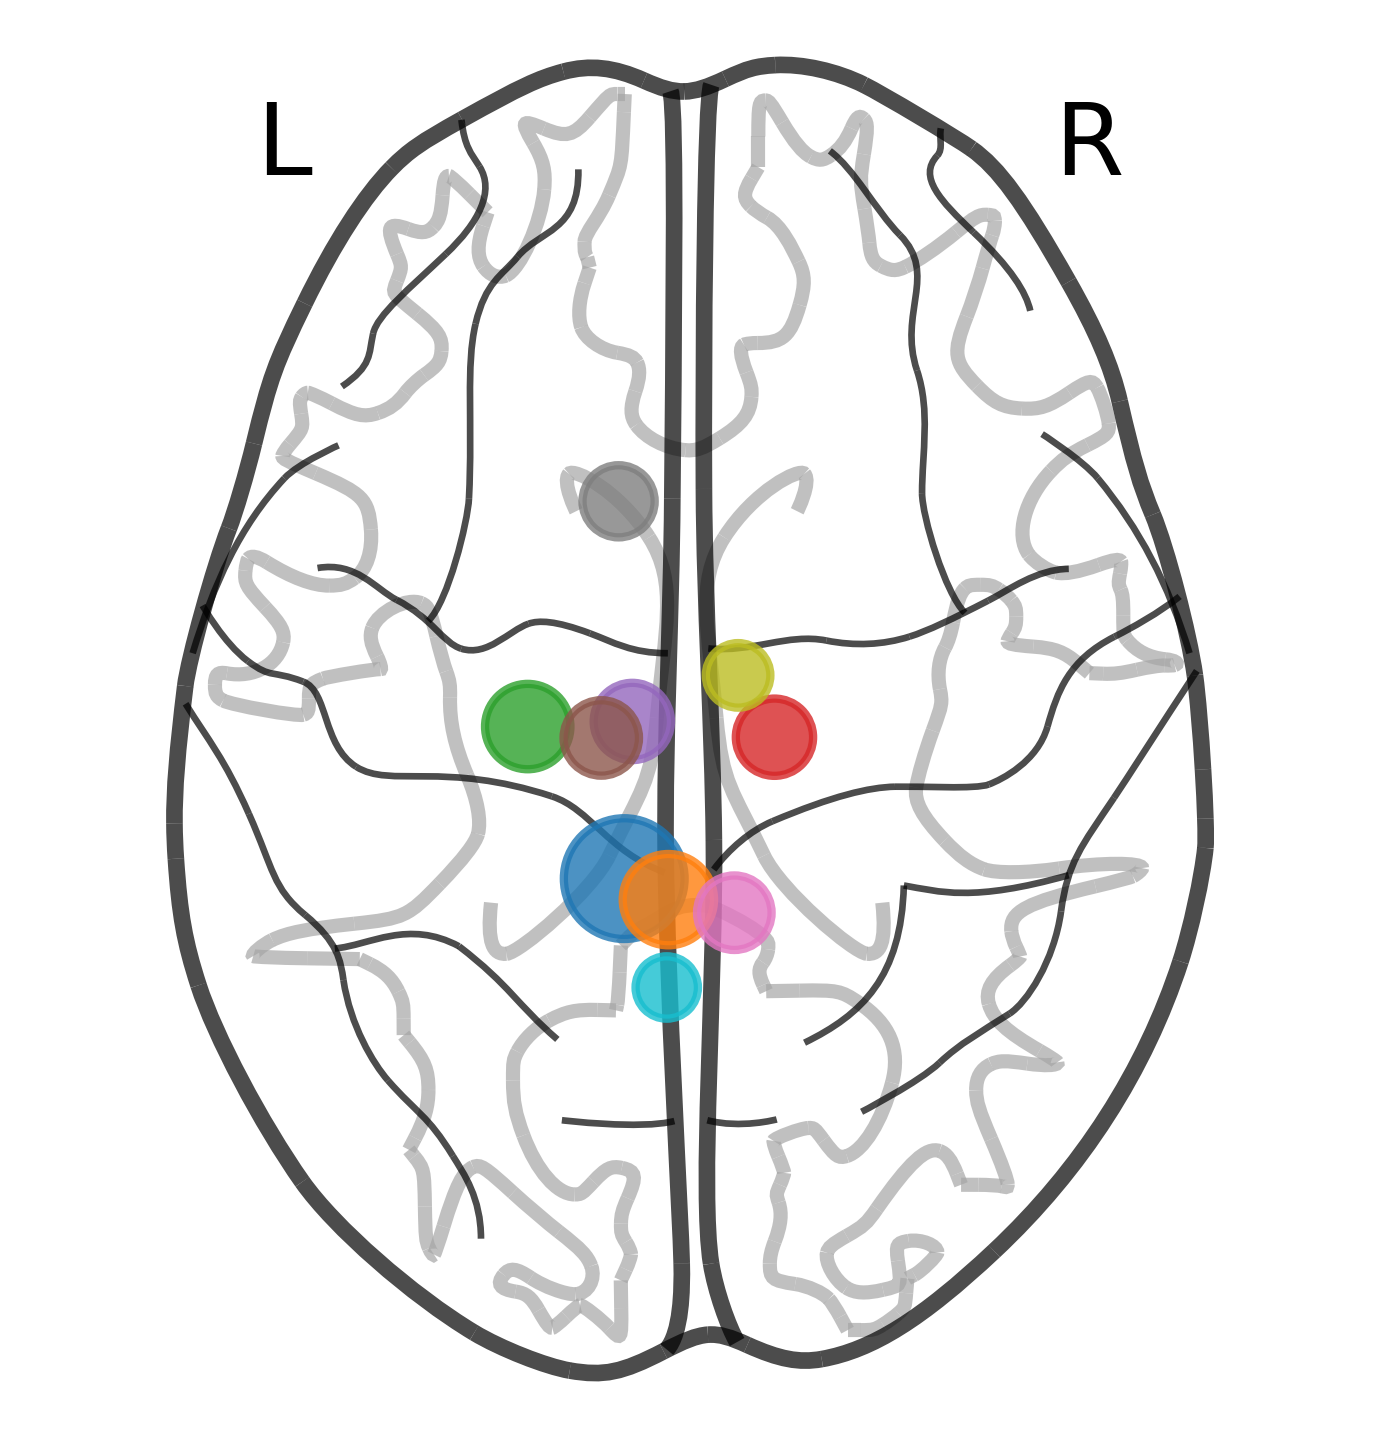

In [22]:
import numpy as np
import nibabel as nib
from nilearn import datasets, plotting, input_data
import matplotlib.colors as mcolors
import matplotlib.patches as mpatches

# Load the AAL atlas
aal_dataset = datasets.fetch_atlas_aal()
aal_maps = aal_dataset.maps
aal_labels = aal_dataset.labels
n_rois = 10
colors = plt.cm.tab10(np.linspace(0, 1, n_rois))
# Mask the volume with the AAL atlas
masker = input_data.NiftiLabelsMasker(labels_img=aal_maps)
# masked_data = masker.fit_transform(v_i)
# Extract ROI coordinates and plot spheres
roi_coords = []
r = []
roi_labels = []
n_voxels = []
for i, v in zip(idx[:n_rois], act[:n_rois]):
    label = aal_labels[i]
    roi_labels.append(label)
    data = (aal_atlas.get_fdata() == int(aal.indices[i])).astype(int)
    n_voxels.append(len(np.where(aal_atlas.get_fdata() == int(aal.indices[i]))[0]))
    print(label, n_voxels[-1])
    mask = image.new_img_like(aal_atlas, data)
    coords = plotting.find_parcellation_cut_coords(mask)
    r.append(int((v*100)*10))
    roi_coords.append(coords)
adj = np.identity(len(roi_coords))
roi_coords = np.array(roi_coords)
roi_coords = np.squeeze(roi_coords, axis=1)
r = np.array(r)
# print(r)
plotting.plot_connectome(adj, roi_coords, node_size=r, display_mode='z', node_color=colors, node_kwargs={"alpha":0.8})
plt.savefig('results/plots/sr_roi.eps', dpi=2000)

In [29]:
print(aal_atlas.get_fdata().shape)

(91, 109, 91)


In [32]:
func_img_aal = image.resample_to_img(func_img, aal_atlas)
idx_n_vox = np.argsort(n_voxels)[::-1]


number of voxels: 5104
name of the region: Frontal_Mid_R


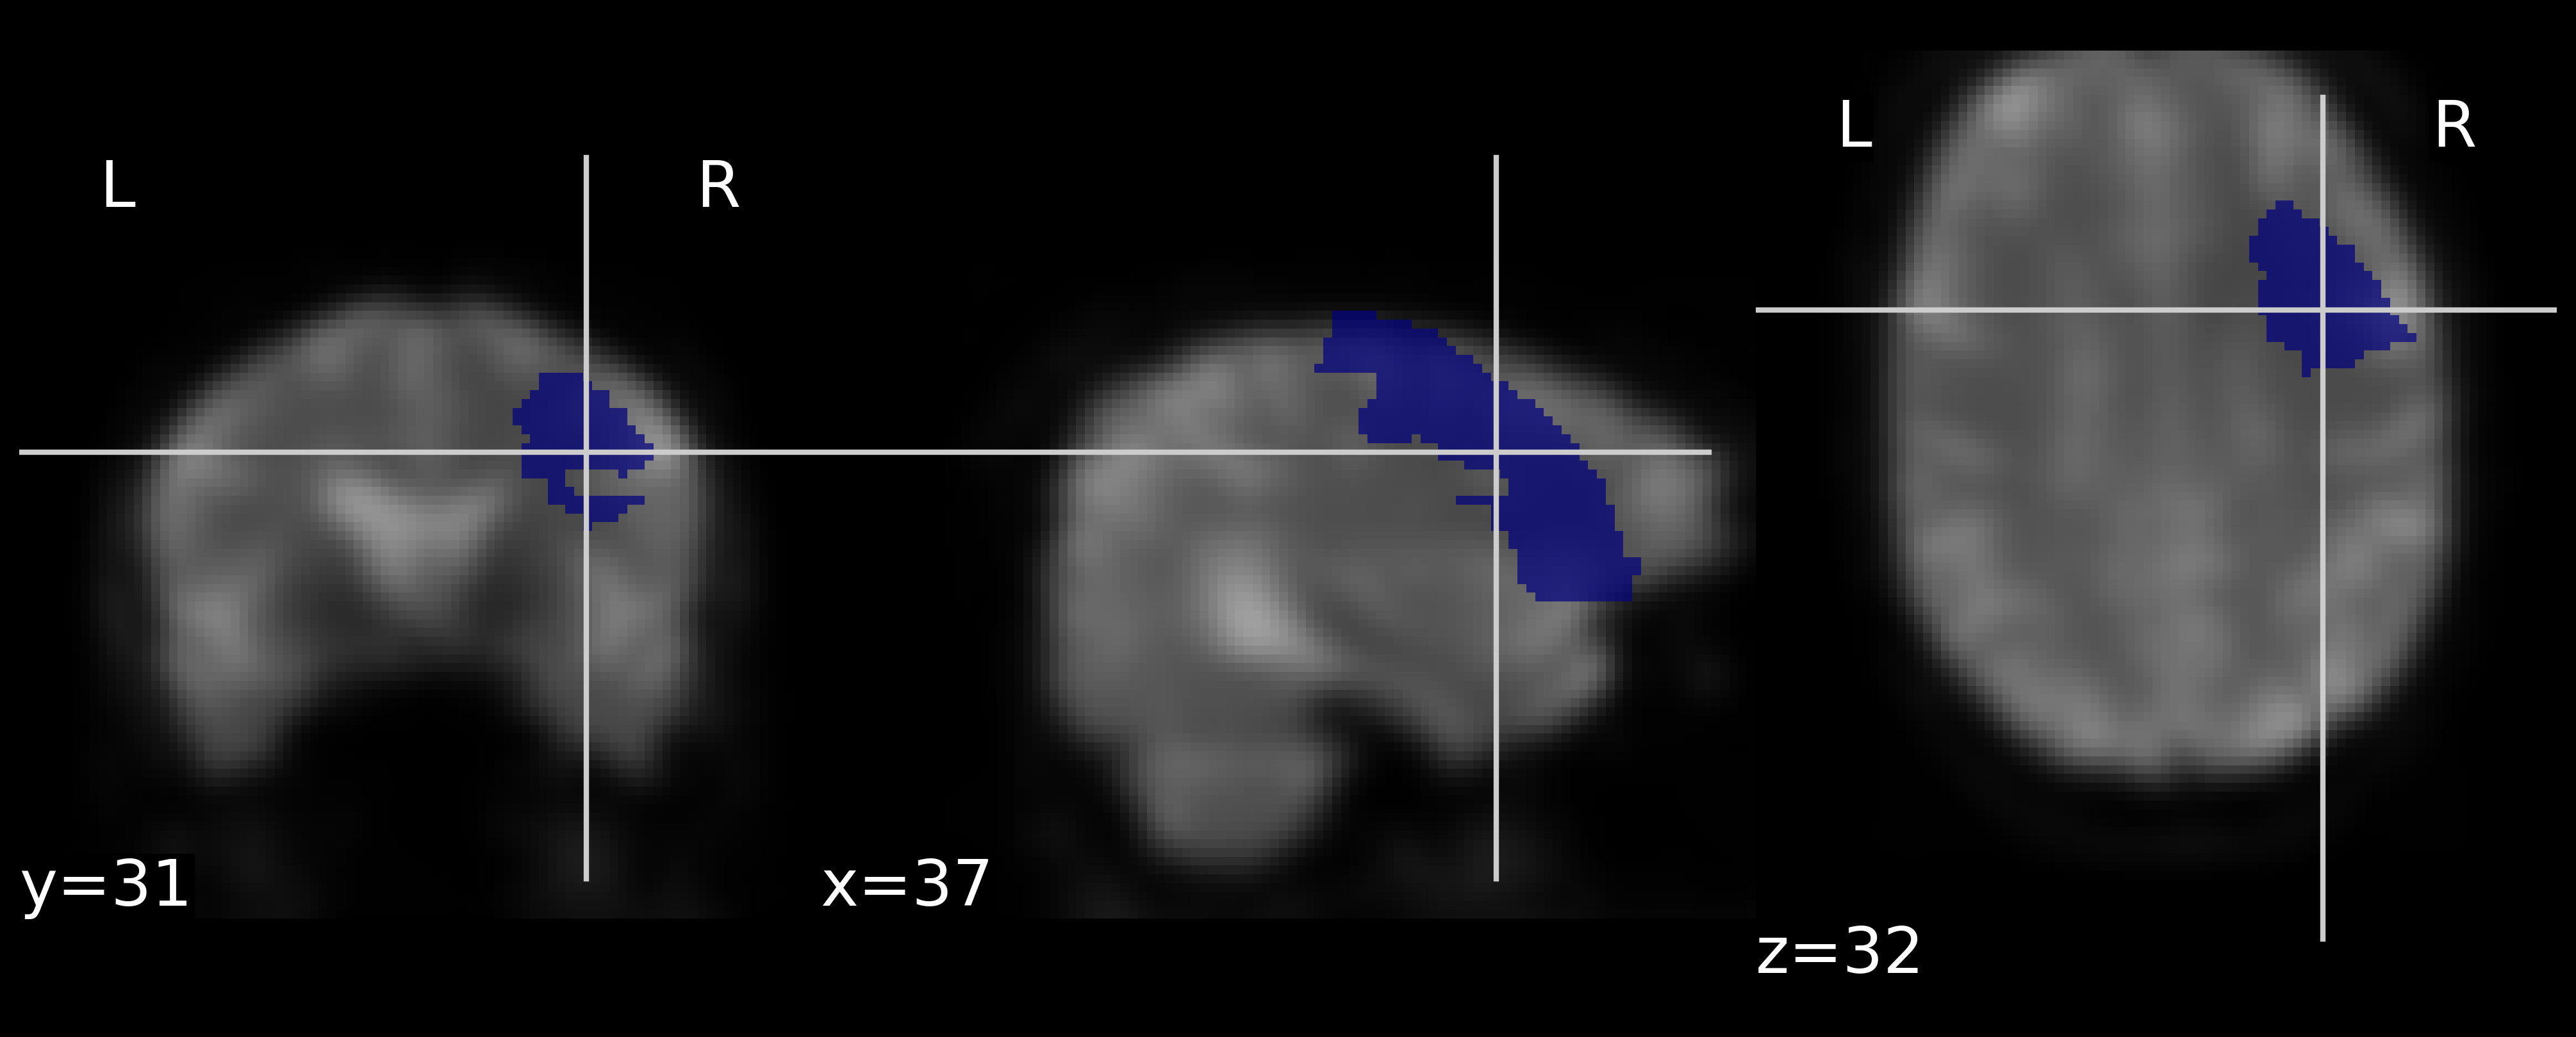

In [33]:
idx_n_vox = np.argsort(n_voxels)[::-1]
print("number of voxels:", n_voxels[idx_n_vox[0]])
i = idx[idx_n_vox[0]]
print("name of the region:", aal_labels[i])
data = (aal_atlas.get_fdata() == int(aal.indices[i])).astype(int)
mask = image.new_img_like(aal_atlas, data)
plotting.plot_roi(mask, image.mean_img(func_img_aal))

In [37]:
nib.save(mask, 'Frontal_Mid_R_MASK.nii.gz')

In [38]:
from nilearn.masking import apply_mask
from nilearn import datasets, image
import nibabel as nib

mask = nib.load('Frontal_Mid_R_MASK.nii.gz')
aal = datasets.fetch_atlas_aal()
aal_atlas = nib.load(aal.maps)
def get_roi_signal(func_img, mask):
    func_img_aal = image.resample_to_img(func_img, aal_atlas)
    func_masked = apply_mask(func_img_aal, mask)
    return func_masked
get_roi_signal(func_img, mask)

array([[ 529882.4 , 2314021.5 ,  681506.1 , ..., 1505561.6 , 1509848.8 ,
        1552872.2 ],
       [ 507659.72, 2216505.  ,  653024.7 , ..., 1475539.6 , 1482100.8 ,
        1519910.1 ],
       [ 497291.56, 2164799.8 ,  640097.  , ..., 1466487.1 , 1473560.9 ,
        1509122.6 ],
       ...,
       [ 500122.28, 1966333.  ,  616217.7 , ..., 1445862.6 , 1448786.9 ,
        1490403.5 ],
       [ 478051.7 , 2038433.8 ,  599611.25, ..., 1427264.6 , 1434838.9 ,
        1469050.4 ],
       [ 480904.16, 2008128.6 ,  601831.9 , ..., 1430200.2 , 1436435.6 ,
        1470528.2 ]], dtype=float32)

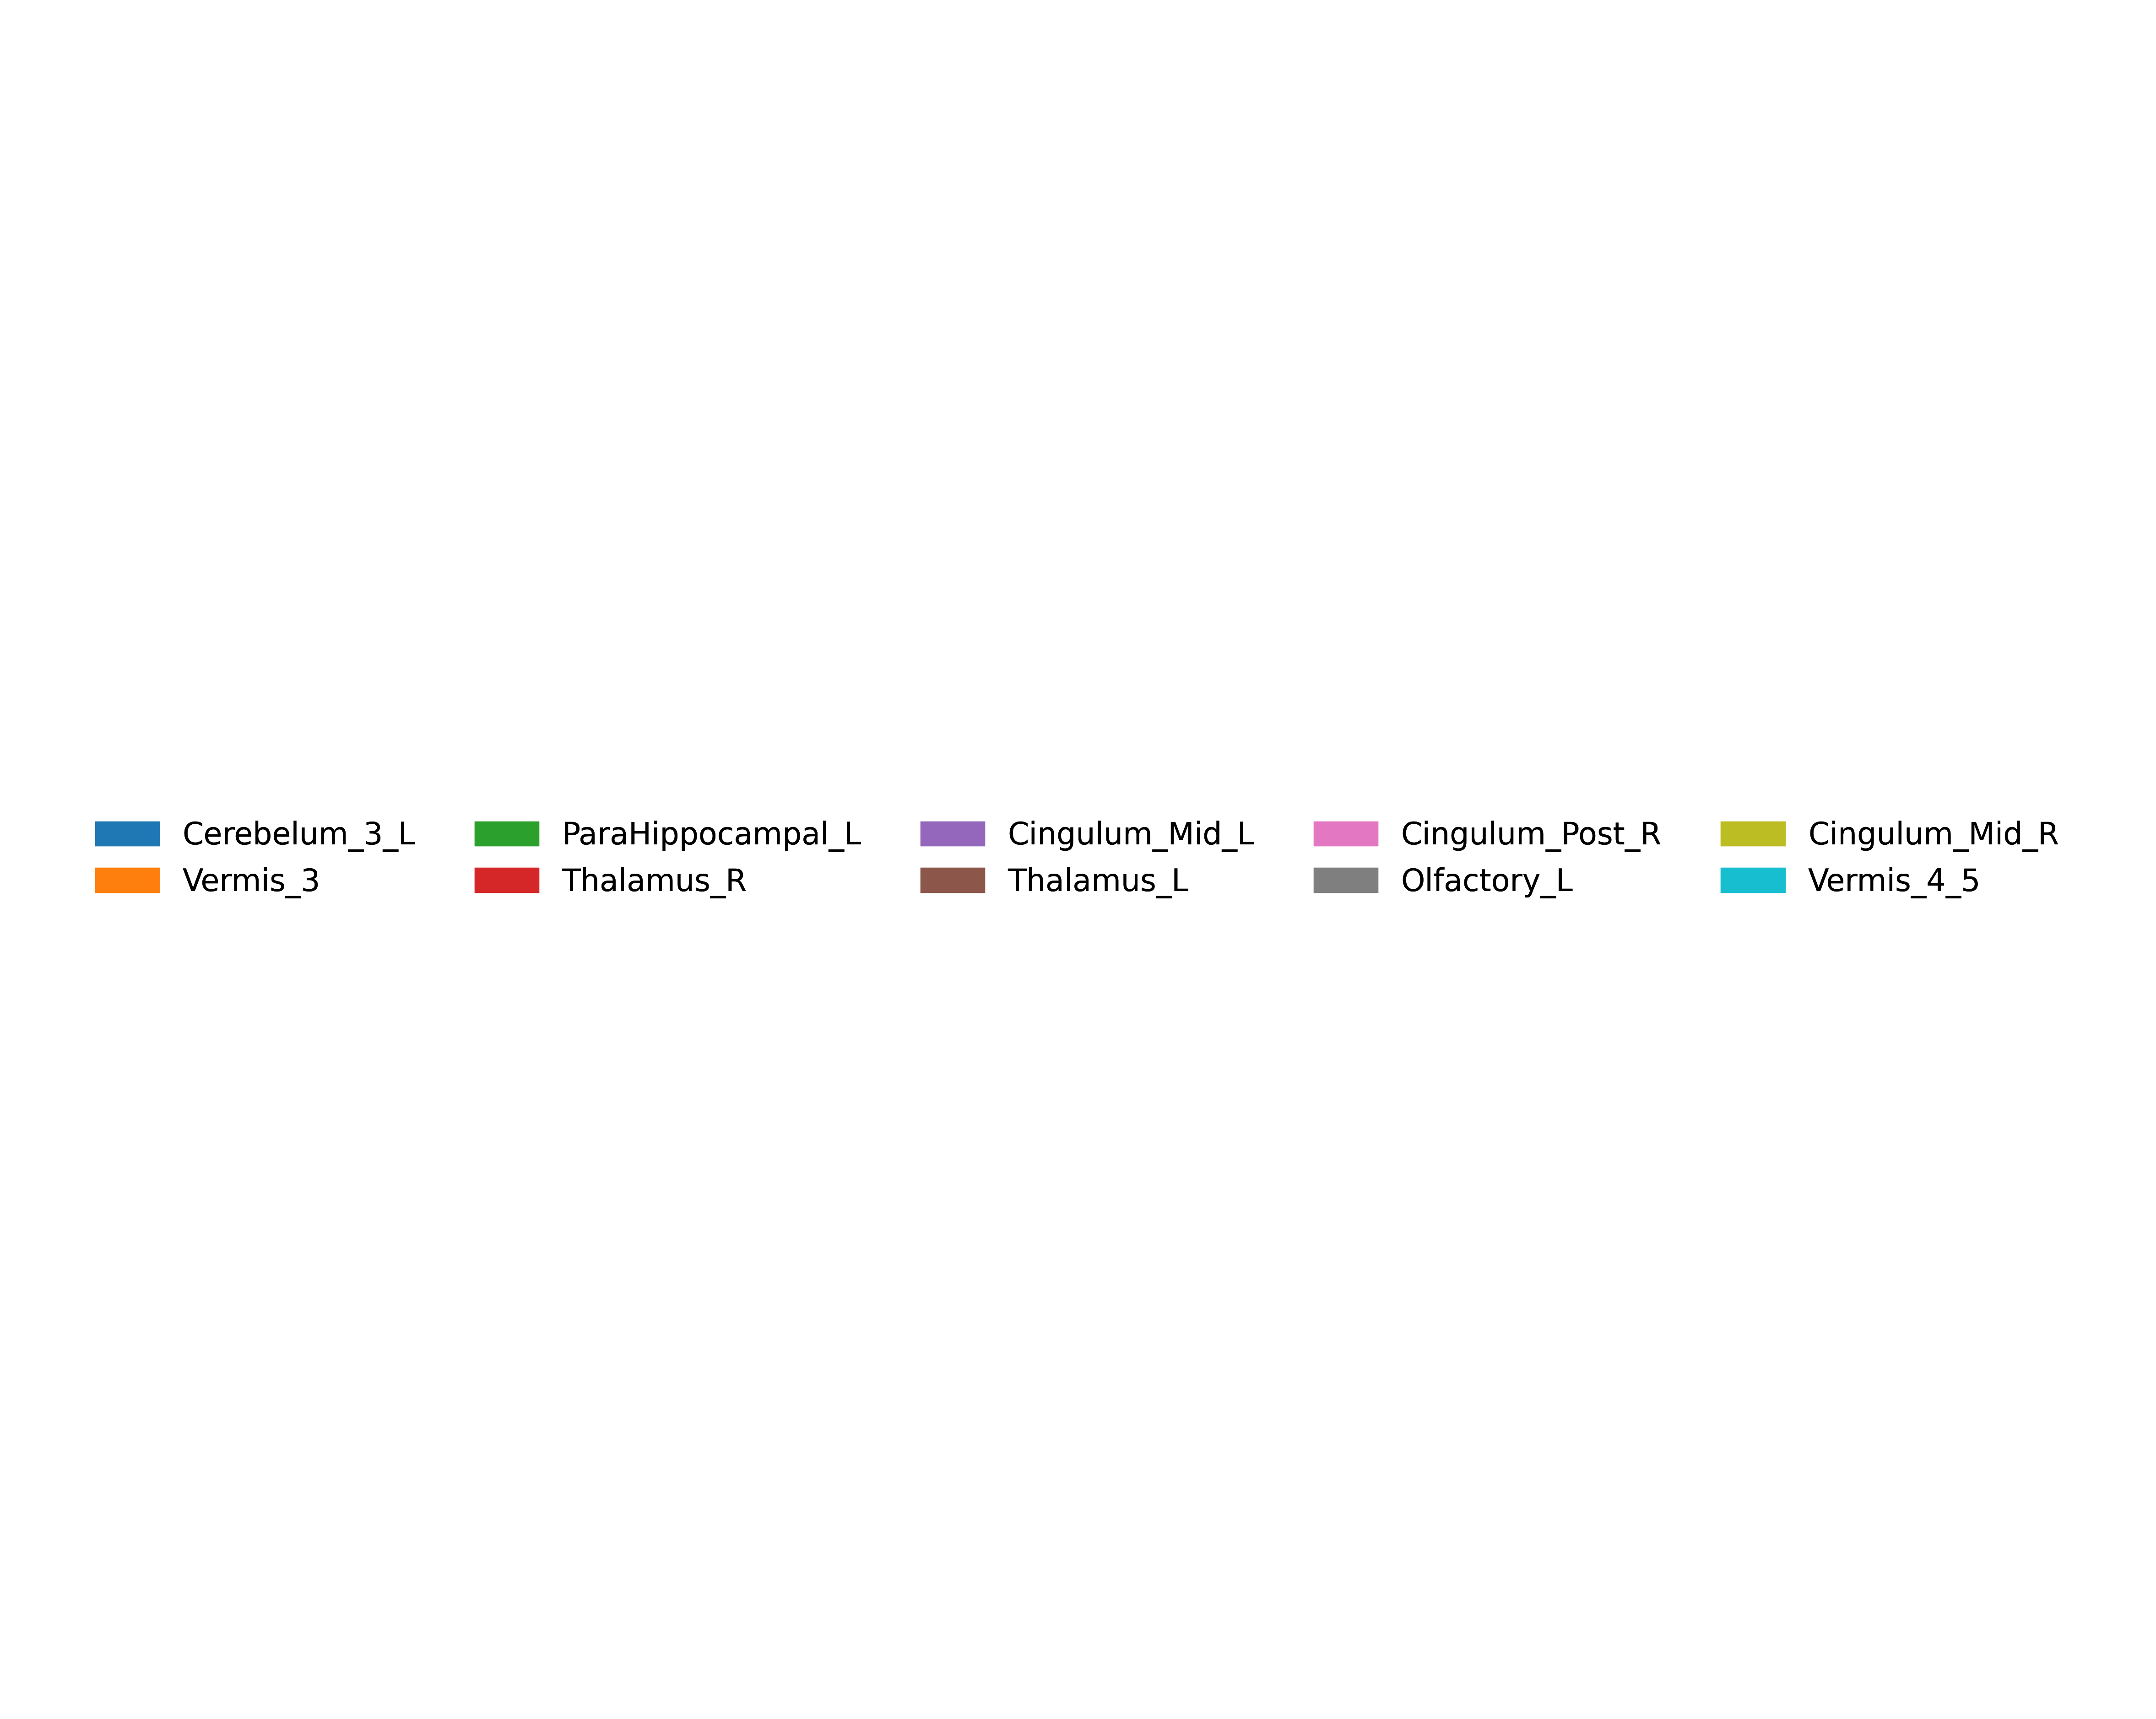

In [25]:
# fig, ax = plt.subplots()
patch_list = [mpatches.Patch(color=colors[i], label=roi_labels[i]) for i in range(n_rois)]
# legend = plt.legend(handles=patch_list, bbox_to_anchor=(1.05, 1), loc='upper left')
# fig.subplots_adjust(right=0.8)
# plt.gca().add_artist(legend)
# plt.show()
fig = plt.figure(figsize=(10, 8))

# Create an axis object and plot nothing on it
ax = fig.add_subplot(111)
ax.plot([], [])
ax.axis('off')

# Create the legend using the patch_list and labels
# legend = plt.legend(handles=patch_list, loc='center')
legend = plt.legend(handles=patch_list, loc='center', ncol=5)
# Add the legend to the axis object
ax.add_artist(legend)

# Show the legend
plt.savefig('results/plots/roi_labels.eps', dpi=1200)
# plt.tight_layout()
# plt.show()

Unique values in mask image: [0 1]
Sum of mask image: 3381


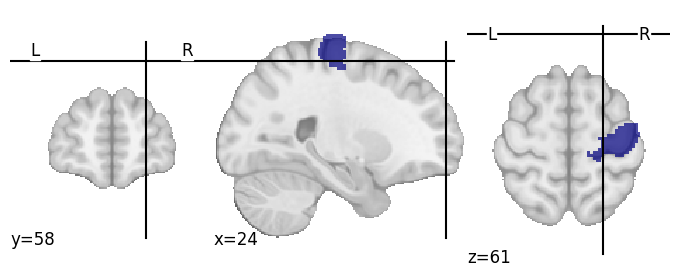

In [46]:
mask_data = roi_mask
unique_values = np.unique(mask_data)
print("Unique values in mask image:", unique_values)
mask_sum = np.sum(mask_data)
print("Sum of mask image:", mask_sum)
plotting.plot_roi(roi_mask_img,display_mode='ortho', cut_coords=com)

In [30]:
np.unique(aal_atlas.get_fdata())

(117,)

In [28]:
len(np.where(aal_atlas.get_fdata() == 2001)[0])

3526

## Calculating brain mask

In [4]:
# func_imgs = [dloader.get_func(i) for i in range(len(dloader.subjects_list))] 
func_imgs = [dloader.get_func(i) for i in range(2)] 

In [26]:
template_img = dloader.get_func(31)

template_img.get_fdata().shape, template_img.affine

((51, 67, 67, 140),
 array([[   3.99998975,    0.        ,    0.        ,  -95.25526428],
        [   0.        ,    4.        ,    0.        , -120.70028687],
        [   0.        ,    0.        ,    4.        , -134.97929382],
        [   0.        ,    0.        ,    0.        ,    1.        ]]))

In [5]:
import os
from nipype.interfaces import fsl
from nilearn import image, datasets

os.environ['FSLDIR'] = '/home/shivansh.seth/fsl'
os.environ['PATH'] = os.environ['FSLDIR'] + '/bin:' + os.environ['PATH']
os.environ['FSLOUTPUTTYPE'] = 'NIFTI_GZ'

# Load the MNI152 template
template_img = datasets.load_mni152_template()

# Load the subject's fMRI data
# Perform linear registration using FLIRT
flirt = fsl.FLIRT(reference=template_img, in_file=func_imgs[0], cost='corratio', dof=12)
flirt.run()
linear_reg_fmri_img = flirt.outputs.out_file

# Perform nonlinear registration using FNIRT
fnirt = fsl.FNIRT(ref_file=template_img, in_file=linear_reg_fmri_img, refmask=template_img.get_fdata() > 0, aff_file=flirt.outputs.out_matrix_file, config='T1_2_MNI152_2mm')
fnirt.run()
nonlinear_reg_fmri_img = fnirt.outputs.fieldcoeff_file

# Apply the nonlinear transformation to the original fMRI data
full_reg_fmri_img = fsl.ApplyWarp(in_file=fmri_img, ref_file=template_img, field_file=nonlinear_reg_fmri_img).run().outputs.out_file


TraitError: The 'reference' trait of a FLIRTInputSpec instance must be a pathlike object or string representing an existing file, but a value of "\n<class 'nibabel.nifti1.Nifti1Image'>\ndata shape (197, 233, 189)\naffine:\n[[   1.    0.    0.  -98.]\n [   0.    1.    0. -134.]\n [   0.    0.    1.  -72.]\n [   0.    0.    0.    1.]]\nmetadata:\n<class 'nibabel.nifti1.Nifti1Header'> object, endian='<'\nsizeof_hdr      : 348\ndata_type       : b''\ndb_name         : b''\nextents         : 0\nsession_error   : 0\nregular         : b''\ndim_info        : 0\ndim             : [  3 197 233 189   1   1   1   1]\nintent_p1       : 0.0\nintent_p2       : 0.0\nintent_p3       : 0.0\nintent_code     : none\ndatatype        : float32\nbitpix          : 32\nslice_start     : 0\npixdim          : [1. 1. 1. 1. 1. 1. 1. 1.]\nvox_offset      : 0.0\nscl_slope       : nan\nscl_inter       : nan\nslice_end       : 0\nslice_code      : unknown\nxyzt_units      : 0\ncal_max         : 0.0\ncal_min         : 0.0\nslice_duration  : 0.0\ntoffset         : 0.0\nglmax           : 0\nglmin           : 0\ndescrip         : b''\naux_file        : b''\nqform_code      : unknown\nsform_code      : aligned\nquatern_b       : 0.0\nquatern_c       : 0.0\nquatern_d       : 0.0\nqoffset_x       : -98.0\nqoffset_y       : -134.0\nqoffset_z       : -72.0\nsrow_x          : [  1.   0.   0. -98.]\nsrow_y          : [   0.    1.    0. -134.]\nsrow_z          : [  0.   0.   1. -72.]\nintent_name     : b''\nmagic           : b'n+1'\n" <class 'str'> was specified.

In [6]:
new_voxel_size = (3, 3, 3)
target_affine = np.copy(template_img.affine)
target_affine[:3, :3] = np.diag(new_voxel_size)
mni_downsampled = image.resample_img(template_img, target_affine=target_affine)
template_img.affine, mni_downsampled.affine, mni_downsampled.shape

(array([[   1.,    0.,    0.,  -98.],
        [   0.,    1.,    0., -134.],
        [   0.,    0.,    1.,  -72.],
        [   0.,    0.,    0.,    1.]]),
 array([[   3.,    0.,    0.,  -98.],
        [   0.,    3.,    0., -134.],
        [   0.,    0.,    3.,  -72.],
        [   0.,    0.,    0.,    1.]]),
 (67, 79, 64))

In [27]:
from nilearn import datasets
from nilearn.image import resample_img
func_imgs_re = []
for img in func_imgs:
    print(img.affine)
    new_img = image.resample_img(img, target_affine=template_img.affine, target_shape=template_img.shape[:-1])
    func_imgs_re.append(new_img)
    print(new_img.affine)

[[   3.99998975    0.            0.          -98.5997467 ]
 [   0.            4.            0.         -122.83447266]
 [   0.            0.            4.         -137.70785522]
 [   0.            0.            0.            1.        ]]
[[   3.99998975    0.            0.          -95.25526428]
 [   0.            4.            0.         -120.70028687]
 [   0.            0.            4.         -134.97929382]
 [   0.            0.            0.            1.        ]]
[[   3.99998975    0.            0.          -98.5997467 ]
 [   0.            4.            0.         -121.99835205]
 [   0.            0.            4.         -151.50384521]
 [   0.            0.            0.            1.        ]]
[[   3.99998975    0.            0.          -95.25526428]
 [   0.            4.            0.         -120.70028687]
 [   0.            0.            4.         -134.97929382]
 [   0.            0.            0.            1.        ]]


In [29]:
brain_mask = masking.compute_epi_mask(template_img)
# print('Before skull stripping, number of voxels =', fdata.shape[0]*fdata.shape[1]*fdata.shape[2])
# Apply the brain mask to the fMRI data
fmri_masked_img = masking.apply_mask(func_imgs_re[0], brain_mask)
print('After skull stripping, number of voxels =', fmri_masked_img.shape[1])

After skull stripping, number of voxels = 33449


In [20]:
# np.save('skull_indices', skull_indices)

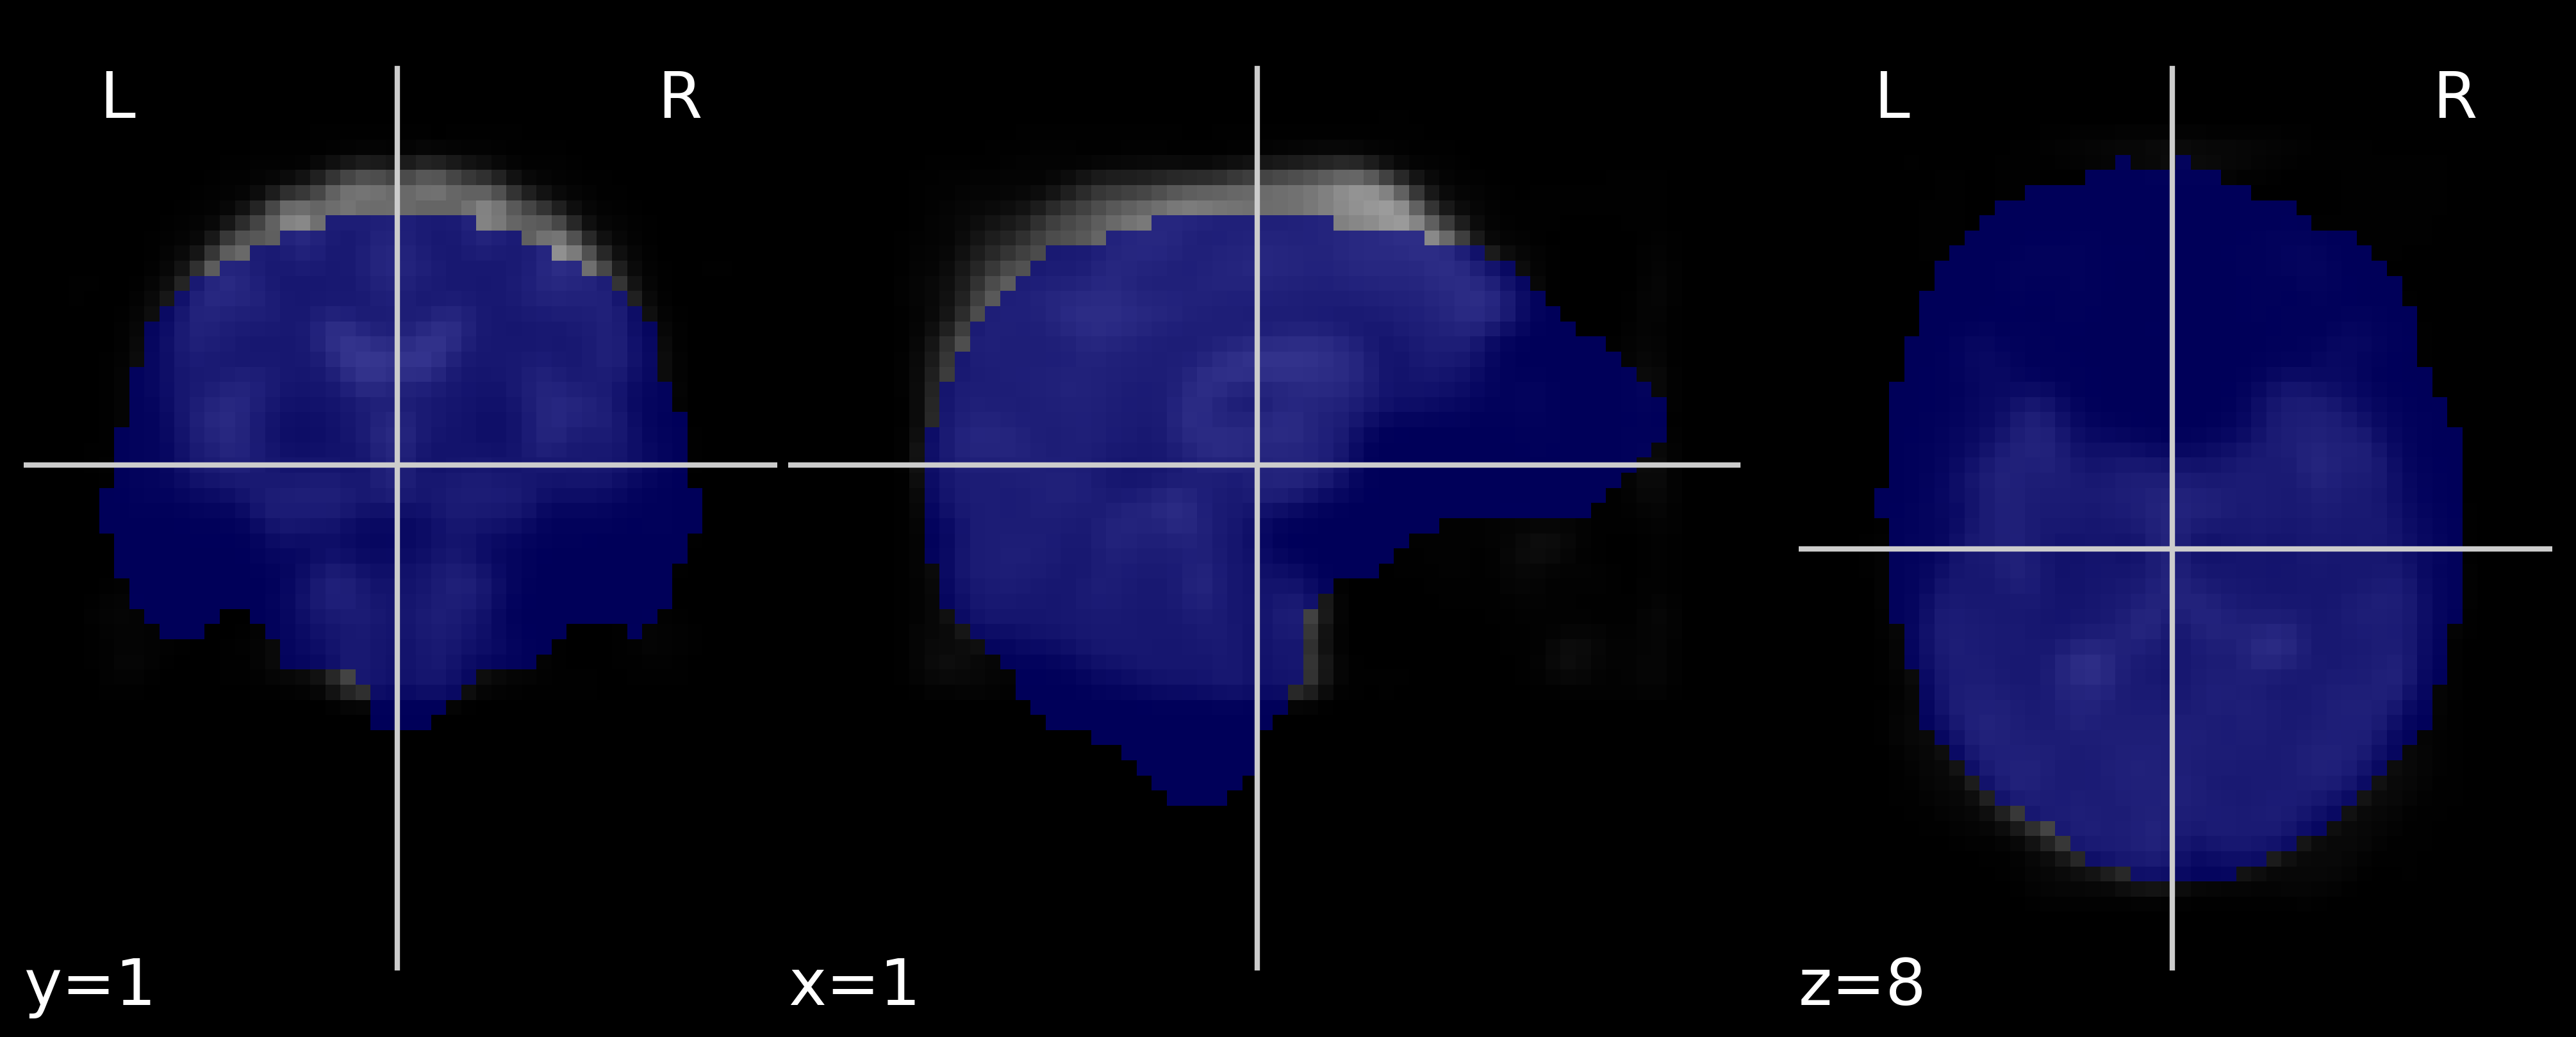

In [33]:
plotting.plot_roi(brain_mask, image.index_img(func_imgs_re[0], 30))

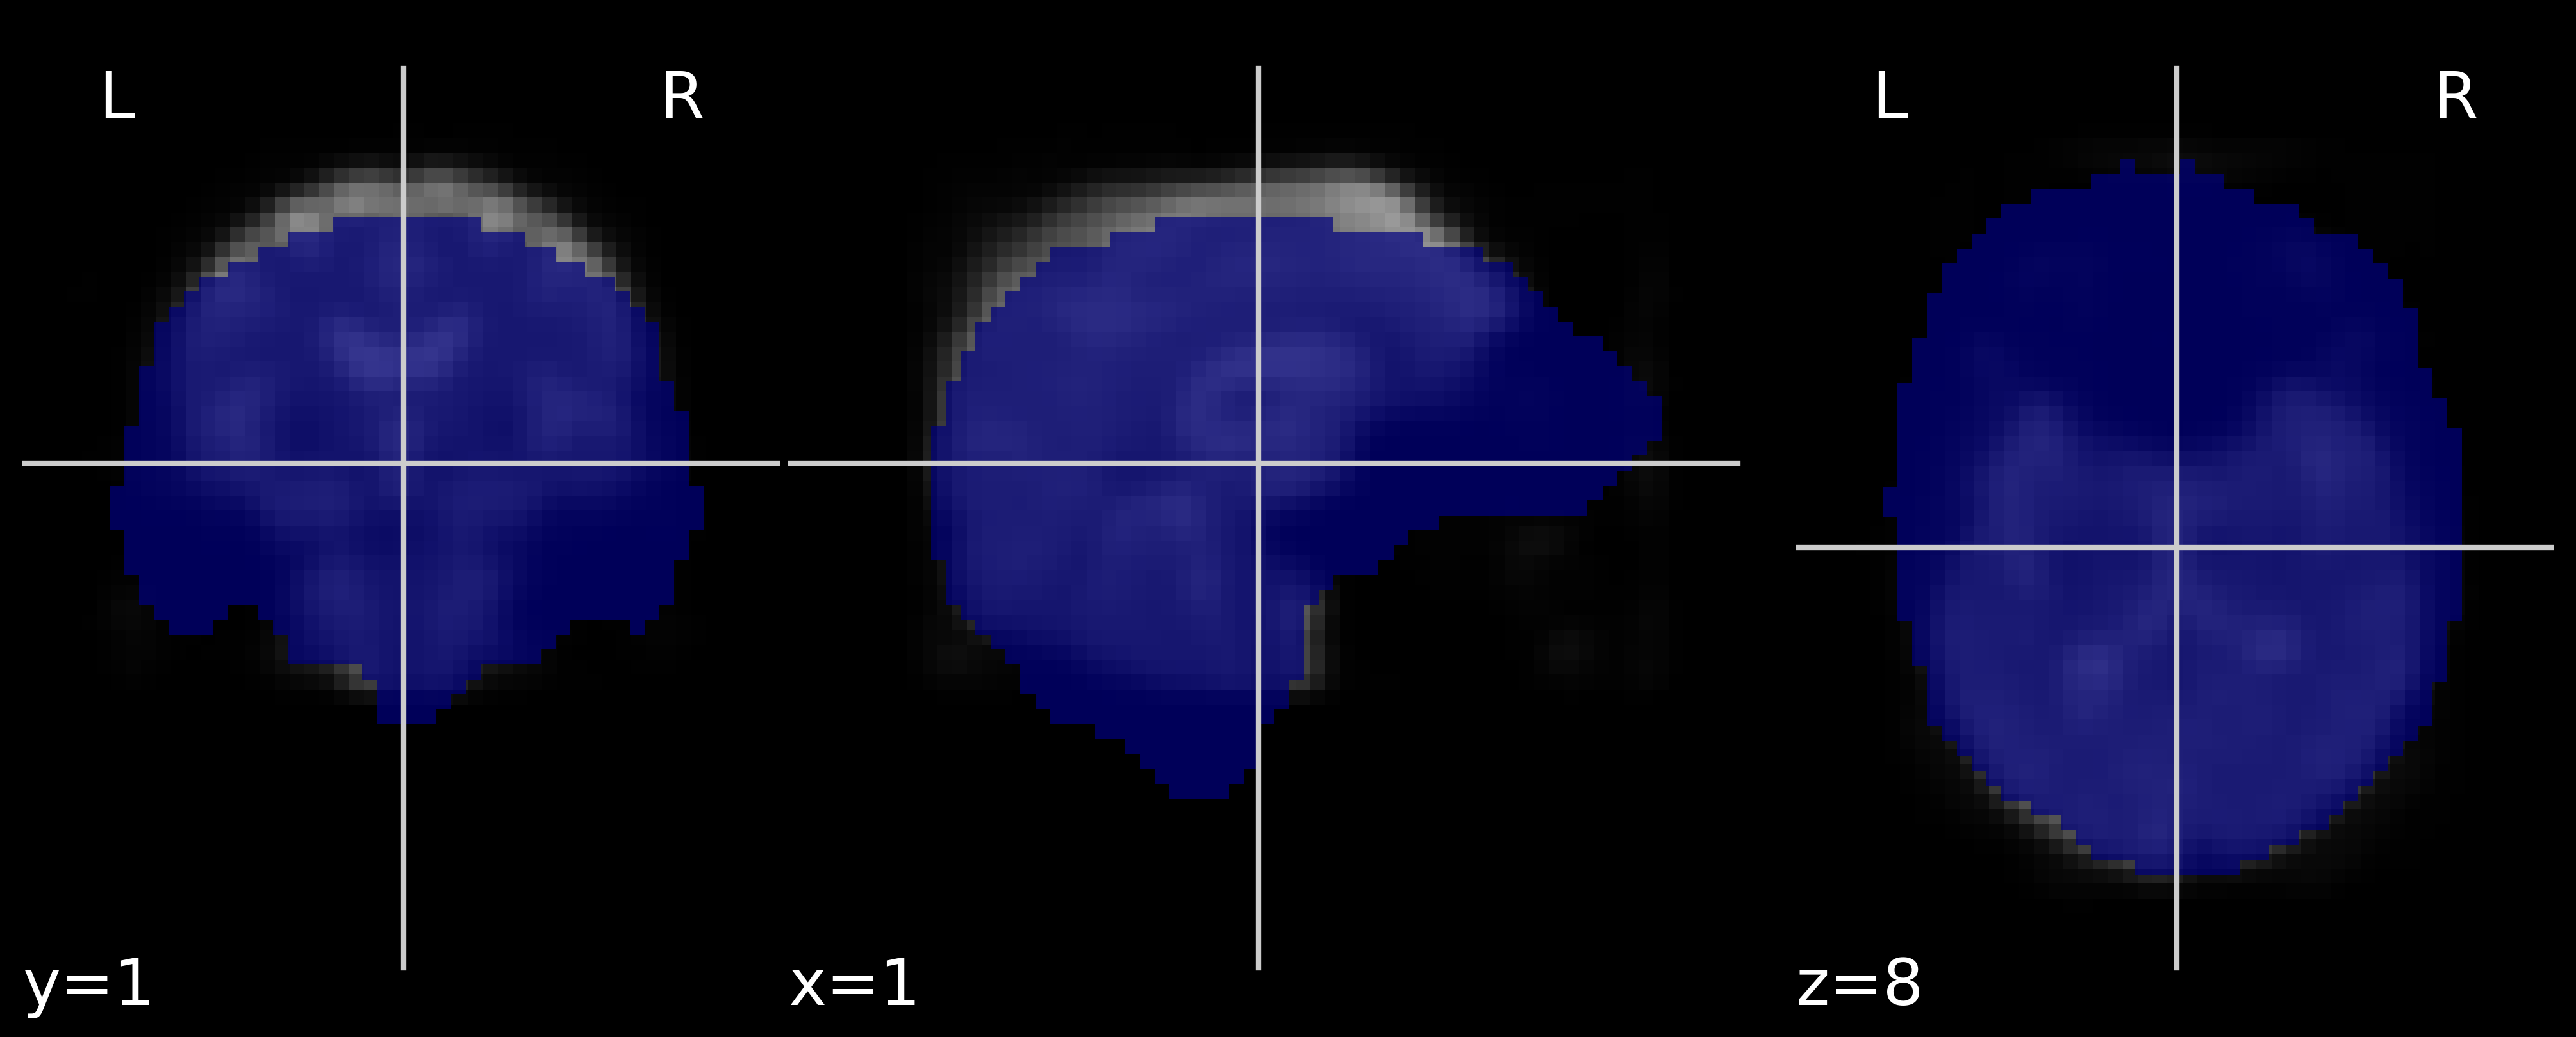

In [32]:
plotting.plot_roi(brain_mask, image.index_img(func_imgs[0], 30))

In [31]:
import numpy as np
from nilearn import plotting, datasets
from nilearn.image import load_img, new_img_like

aal = datasets.fetch_atlas_aal()
aal_img = load_img(aal.maps)
aal_data = aal_img.get_fdata()

In [32]:
np.unique(aal_data)

array([   0., 2001., 2002., 2101., 2102., 2111., 2112., 2201., 2202.,
       2211., 2212., 2301., 2302., 2311., 2312., 2321., 2322., 2331.,
       2332., 2401., 2402., 2501., 2502., 2601., 2602., 2611., 2612.,
       2701., 2702., 3001., 3002., 4001., 4002., 4011., 4012., 4021.,
       4022., 4101., 4102., 4111., 4112., 4201., 4202., 5001., 5002.,
       5011., 5012., 5021., 5022., 5101., 5102., 5201., 5202., 5301.,
       5302., 5401., 5402., 6001., 6002., 6101., 6102., 6201., 6202.,
       6211., 6212., 6221., 6222., 6301., 6302., 6401., 6402., 7001.,
       7002., 7011., 7012., 7021., 7022., 7101., 7102., 8101., 8102.,
       8111., 8112., 8121., 8122., 8201., 8202., 8211., 8212., 8301.,
       8302., 9001., 9002., 9011., 9012., 9021., 9022., 9031., 9032.,
       9041., 9042., 9051., 9052., 9061., 9062., 9071., 9072., 9081.,
       9082., 9100., 9110., 9120., 9130., 9140., 9150., 9160., 9170.])

In [29]:
aal_selected = new_img_like(aal_img)
aal_data = aal_selected.get_fdata()
for i in idx[:5]:
    aal_selected[np.where(aal_data == )]

array([ 94, 109,  38,  77,  32,  76,  35,  20,  33, 110,  69,  96,  36,
        34,  46,  67,  74,  21,  18,  43,  39,  37,  10,  72,  42,  19,
        11,  66,  28,  47,  54,  84,  48,  41,  45,  44,  40, 115,  26,
        31,  13,   1,   2,   3,   4,   5,   6,   7,   8,   9,  12,  14,
        30,  15,  16,  17,  22,  23,  24,  25,  50,  27,  29,  49,  57,
        51, 100,  88,  89,  90,  91,  92,  93,  95,  97,  98,  99, 101,
        86, 102, 103, 104, 105, 106, 107, 108, 111, 112, 113,  87,  85,
        52,  64,  53,  55,  56, 114,  58,  59,  60,  61,  62,  63,  65,
        83,  68,  70,  71,  73,  75,  78,  79,  80,  81,  82,   0])

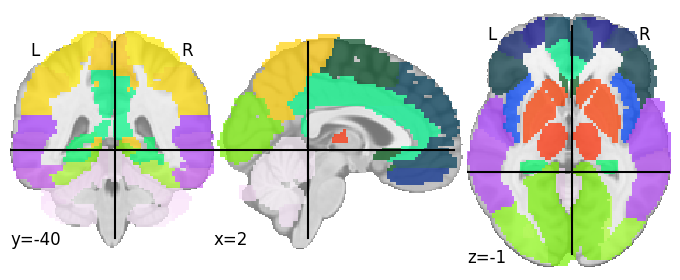

In [25]:
plotting.plot_roi(aal_img)

In [33]:
import numpy as np
import nibabel as nib
from nilearn import plotting, datasets

# Load the AAL atlas
aal = datasets.fetch_atlas_aal()

# Get the region coordinates
region_coords = np.vstack(nib.freesurfer.io.read_annot(aal.labels))[::, :3]

# Create a new brain image with all regions marked as spheres
display = plotting.plot_roi(None, draw_cross=False, title='AAL regions on MNI152 2mm', bg_img=datasets.load_mni152_template())

# Add spheres and region names for each AAL region
for i, (region_coord, region_name) in enumerate(zip(region_coords, aal.labels)):
    sphere = plotting.plot_sphere(region_coord, color='b', radius=3, opacity=0.5, ax=display.axes)
    text = plotting.annotate_text_3d(display.axes, xyz=region_coord, s=region_name.decode('utf-8'), size=10)

TypeError: expected str, bytes or os.PathLike object, not list

In [34]:
aal

{'description': 'AAl atlas for SPM 12\n\n\nNotes\n-----\nThis atlas is the result of an automated anatomical parcellation of the spatially normalized single-subject high-resolution T1 volume provided by the Montreal Neurological Institute (MNI) (D. L. Collins et al., 1998, Trans. Med. Imag. 17, 463-468, PubMed).\n\nUsing this parcellation method, three procedures to perform the automated anatomical labeling of functional studies are proposed: (1) labeling of an extremum defined by a set of coordinates, (2) percentage of voxels belonging to each of the AVOI intersected by a sphere centered by a set of coordinates, and (3) percentage of voxels belonging to each of the AVOI intersected by an activated cluster.\n\n\nContent\n-------\n    :"regions": str. path to nifti file containing regions.\n    :"labels": dict. labels dictionary with their region id as key and name as value\n\n\nReferences\n-----\nFor more information on this dataset\'s structure, see\nhttp://www.gin.cnrs.fr/AAL-217?lan